<a href="https://colab.research.google.com/github/vanyagoncharov/CourseMLResourse/blob/main/dz_20_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импорт используемых библиотек
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Загрузка данных
data = sns.load_dataset('titanic')
# Разделение на целевую переменную и показатели
X = data.drop(columns='survived')
y = data["survived"]

In [17]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**Сколько строк в датафрейме, сколько столбцов
Сколько места занимает датафрейм в оперативной памяти**

In [5]:
# Вывод информации о датасете
print(f'Информация о датасете: \n {X.shape[0]}: строк\n {X.shape[1]}: столбцов\n '
      f'{np.round(data.memory_usage(index=True).sum() / 1024, 4)} КБ: занимаемый объем памяти')

Информация о датасете: 
 891: строк
 14: столбцов
 80.6523 КБ: занимаемый объем памяти


**Для каждой категориальной переменной рассчитать моду и сколько раз мода встречается в данных**

In [6]:
# Выбираем только интервальные переменные (столбцы с числовыми значениями)
num_cols = ['age', 'fare']
num_data = data[num_cols]

# Рассчитываем основные характеристики для каждой переменной
stats_df = num_data.describe().T

# Выводим результат
print(stats_df)

      count       mean        std   min      25%      50%   75%       max
age   714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000
fare  891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292


**Для каждой категориальной переменной рассчитать моду и сколько раз мода встречается в данных**

In [7]:
# Создаем DataFrame, содержащий только категориальные переменные
cat_cols = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
cat_data = data[cat_cols]

# Рассчитываем моду и количество ее встреч для каждой переменной
mode_df = pd.DataFrame({'mode': cat_data.mode().iloc[0], 'count': cat_data.apply(lambda x: x.value_counts().max())})

# Выводим результат
print(mode_df)


                    mode  count
survived               0    549
pclass                 3    491
sex                 male    577
sibsp                  0    608
parch                  0    678
embarked               S    644
class              Third    491
who                  man    537
adult_male          True    537
deck                   C     59
embark_town  Southampton    644
alive                 no    549
alone               True    537


In [8]:
# Анализ пропусков
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# Заполнение пропущенных значений в столбце 'age' медианным значением
data['age'].fillna(data['age'].median(), inplace=True)

# Заполнение пропущенных значений в столбце 'embarked' наиболее часто встречающимся значением
embarked_mode = data['embarked'].mode()[0]
data['embarked'].fillna(embarked_mode, inplace=True)

# Сначала получим текущие категории
current_categories = data['deck'].cat.categories.tolist()
# Добавим новую категорию 'Unknown' в список категорий, если она еще не существует
if 'Unknown' not in current_categories:
  new_categories = current_categories + ['Unknown']
else:
  new_categories = current_categories
# Установим обновленные категории в переменную 'deck'
data['deck'] = data['deck'].cat.set_categories(new_categories)

# Заполнение пропущенных значений в столбце 'deck' значением Unknown
data.loc[data['deck'].isnull(), 'deck'] = 'Unknown'

# Заполнение пропущенных значений в столбце 'embark_town' значением Unknown
data["embark_town"].fillna("Unknown", inplace=True)

In [10]:
# Анализ пропусков
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

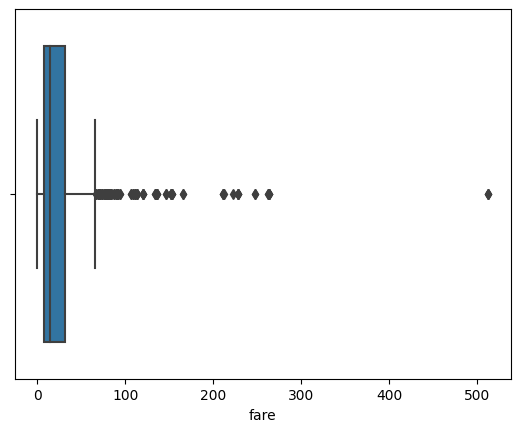

In [16]:
# fare: стоимость билета.
sns.boxplot(x=data["fare"])
plt.show()


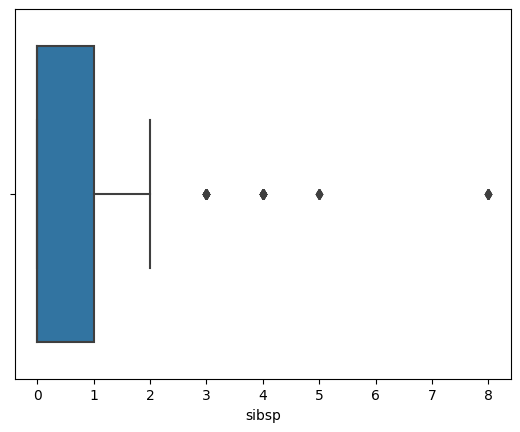

In [18]:
# sibsp: количество братьев/сестер и/или супругов на борту.
sns.boxplot(x=data["sibsp"])
plt.show()


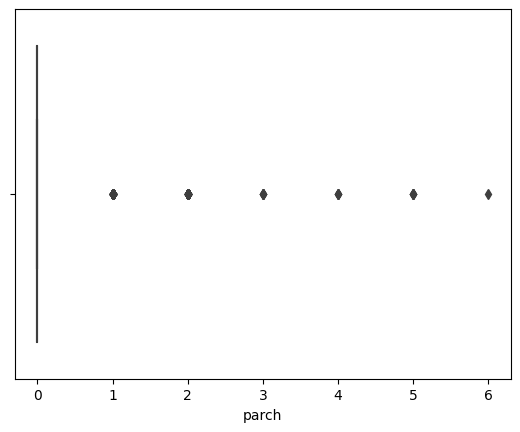

In [19]:
# parch: количество родителей/детей на борту
sns.boxplot(x=data["parch"])
plt.show()

TypeError: ignored

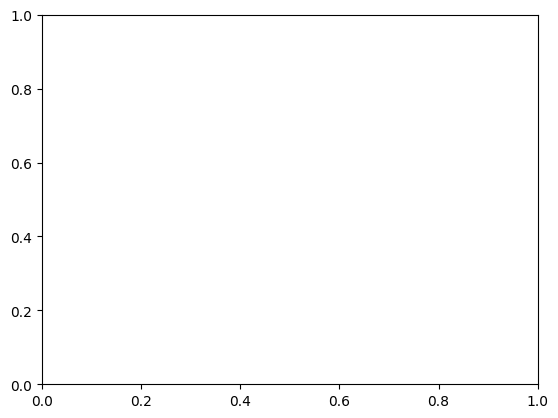

In [28]:
# alone: указывает, был ли пассажир на борту один или нет
sns.boxplot(x=data["alone"])
plt.show()

In [29]:
# class: класс каюты, в которой находился пассажир
sns.boxplot(x=data["class"])
plt.show()

TypeError: ignored

In [23]:
# embarked: порт, в котором пассажир сел на борт Титаника.
sns.boxplot(x=data["embarked"])
plt.show()

TypeError: ignored

In [12]:
Q1 = data["age"].quantile(0.25)
Q3 = data["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data["age"] < lower_bound) | (data["age"] > upper_bound)]


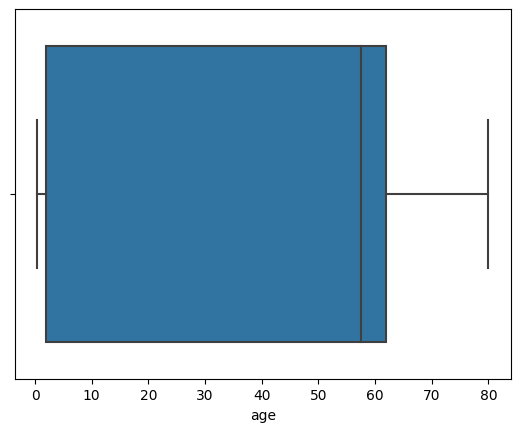

In [15]:
sns.boxplot(x=outliers["age"])
plt.show()